# Demonstrating Oracle Rest Data Services with Python/Pandas

This is a DEMO using Oracle Rest Data Services (ORDS) REST enabled view objects and how to fetch data over
REST against and Oracle Database and then using Pandas to view data.

Ulf Hellström EpicoTech 2021 ulf.hellstrom@epicotech.se

# Verify we can fetch data from ORDS Autorest and print out statuscode etc.

In [2]:
import requests
from pandas import json_normalize
r = requests.get('http://46.101.137.47:8080/ords/f1_access/drivers/?limit=1000')
print(r.status_code)
print(r.headers['content-type'])
print(r.encoding)

200
application/json
utf-8


# Fetch some data over ORDS and normilize JSON and print out the data.

Print out info of all historical F1 Drivers using ORDS URL and AutoRest

In [3]:
import requests
from pandas import json_normalize
r = requests.get('http://46.101.137.47:8080/ords/f1_access/drivers/?limit=1000')
print(r.status_code)
print(r.headers['content-type'])
print(r.encoding)
data = r.json()
result = json_normalize(data,'items')
for index, row in result.iterrows():
    print(row['driverid'],row['givenname'],row['familyname'],row['nationality'],row['info'])


200
application/json
utf-8
abate Carlo Abate Italian http://en.wikipedia.org/wiki/Carlo_Mario_Abate
abecassis George Abecassis British http://en.wikipedia.org/wiki/George_Abecassis
acheson Kenny Acheson British http://en.wikipedia.org/wiki/Kenny_Acheson
adams Philippe Adams Belgian http://en.wikipedia.org/wiki/Philippe_Adams
ader Walt Ader American http://en.wikipedia.org/wiki/Walt_Ader
adolff Kurt Adolff German http://en.wikipedia.org/wiki/Kurt_Adolff
agabashian Fred Agabashian American http://en.wikipedia.org/wiki/Fred_Agabashian
ahrens Kurt Ahrens German http://en.wikipedia.org/wiki/Kurt_Ahrens,_Jr.
aitken Jack Aitken British http://en.wikipedia.org/wiki/Jack_Aitken
albers Christijan Albers Dutch http://en.wikipedia.org/wiki/Christijan_Albers
albon Alexander Albon Thai http://en.wikipedia.org/wiki/Alexander_Albon
alboreto Michele Alboreto Italian http://en.wikipedia.org/wiki/Michele_Alboreto
alesi Jean Alesi French http://en.wikipedia.org/wiki/Jean_Alesi
alguersuari Jaime Alguersuar

irvine Eddie Irvine British http://en.wikipedia.org/wiki/Eddie_Irvine
irwin Chris Irwin British http://en.wikipedia.org/wiki/Chris_Irwin
jabouille Jean-Pierre Jabouille French http://en.wikipedia.org/wiki/Jean-Pierre_Jabouille
jackson Jimmy Jackson American http://en.wikipedia.org/wiki/Jimmy_Jackson_(driver)
james Joe James American http://en.wikipedia.org/wiki/Joe_James_(racing_driver)
john_james John James British http://en.wikipedia.org/wiki/John_James_(auto_racer)
jarier Jean-Pierre Jarier French http://en.wikipedia.org/wiki/Jean-Pierre_Jarier
lehto Jyrki Järvilehto Finnish http://en.wikipedia.org/wiki/Jyrki_J%C3%A4rvilehto
jean Max Jean French http://en.wikipedia.org/wiki/Max_Jean
johansson Stefan Johansson Swedish http://en.wikipedia.org/wiki/Stefan_Johansson
johnson Eddie Johnson American http://en.wikipedia.org/wiki/Eddie_Johnson_(auto_racer)
leslie_johnson Leslie Johnson British http://en.wikipedia.org/wiki/Leslie_Johnson_(racing_driver)
johnstone Bruce Johnstone South African

vyver Syd van der Vyver South African http://en.wikipedia.org/wiki/Syd_van_der_Vyver
lennep Gijs van Lennep Dutch http://en.wikipedia.org/wiki/Gijs_Van_Lennep
rooyen Basil van Rooyen South African http://en.wikipedia.org/wiki/Basil_van_Rooyen
vandoorne Stoffel Vandoorne Belgian http://en.wikipedia.org/wiki/Stoffel_Vandoorne
veith Bob Veith American http://en.wikipedia.org/wiki/Bob_Veith
vergne Jean-Éric Vergne French http://en.wikipedia.org/wiki/Jean-%C3%89ric_Vergne
verstappen Jos Verstappen Dutch http://en.wikipedia.org/wiki/Jos_Verstappen
max_verstappen Max Verstappen Dutch http://en.wikipedia.org/wiki/Max_Verstappen
vettel Sebastian Vettel German http://en.wikipedia.org/wiki/Sebastian_Vettel
villeneuve Jacques Villeneuve Canadian http://en.wikipedia.org/wiki/Jacques_Villeneuve
gilles_villeneuve Gilles Villeneuve Canadian http://en.wikipedia.org/wiki/Gilles_Villeneuve
villeneuve_sr Jacques Villeneuve Sr. Canadian http://en.wikipedia.org/wiki/Jacques_Villeneuve_(elder)
villoresi Luig

## Using Pandas to convert json data to Python Data Frame

Convert json request over ORDS to Pandas Data Frames (e.g 2 dimensional array)
We fetch data for the results of historical Formula 1 races.
It also demonstrates how to use ORDS to filter data and only fetch results for the 2021 season of Formula 1

In [19]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################

import requests as rq
import pandas as pd
r = rq.get('http://46.101.137.47:8080/ords/f1_access/results/?q={"season":"2021"}&limit=1000')
print(r.status_code)
print(r.headers['content-type'])
print(r.encoding)
data = r.json()
df = pd.json_normalize(data,'items')
# Print number of rows in data set
print(df.shape[0])
# Some options to se all rows and cols
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
# Remove some columns we do not need in output
df = df.drop(columns=['info','url','circuitid','positiontext','drivurl','constructorinfo'])
# Sort the Data Frame by race and place in the race
df.sort_values(by=['race','position'], inplace=True)
# Pretty print the Data Frame
df


200
application/json
utf-8
200


,season,race,racename,circuitname,lat,lon,locality,country,racedate,pilotnr,position,points,driverid,givenname,familyname,dateofbirth,nationality,constructorid,constructorname,constructornationality,grid,laps,status,ranking,fastestlap,units,speed,millis,racetime
3,2021,1,Bahrain Grand Prix,Bahrain International Circuit,26.0325,50.5106,Sakhir,Bahrain,2021-03-28,44,1,25,hamilton,Lewis,Hamilton,1985-01-07,British,mercedes,Mercedes,German,2,56,Finished,None,None,None,None,5523897,1:32:03.897
2,2021,1,Bahrain Grand Prix,Bahrain International Circuit,26.0325,50.5106,Sakhir,Bahrain,2021-03-28,33,2,18,max_verstappen,Max,Verstappen,1997-09-30,Dutch,red_bull,Red Bull,Austrian,1,56,Finished,None,None,None,None,5524642,+0.745
19,2021,1,Bahrain Grand Prix,Bahrain International Circuit,26.0325,50.5106,Sakhir,Bahrain,2021-03-28,77,3,16,bottas,Valtteri,Bottas,1989-08-28,Finnish,mercedes,Mercedes,German,3,56,Finished,None,None,None,None,5561280,+37.383
0,2021,1,Bahrain Grand Prix,Bahrain International Circuit,26.0325,50.5106,Sakhir,Bahrain,2021-03-28,4,4,12,norris,Lando,Norris,1999-11-13,British,mclaren,McLaren,British,7,56,Finished,None,None,None,None,5570363,+46.466
1,2021,1,Bahrain Grand Prix,Bahrain International Circuit,26.0325,50.5106,Sakhir,Bahrain,2021-03-28,11,5,10,perez,Sergio,Pérez,1990-01-26,Mexican,red_bull,Red Bull,Austrian,0,56,Finished,None,None,None,None,5575944,+52.047
18,2021,1,Bahrain Grand Prix,Bahrain International Circuit,26.0325,50.5106,Sakhir,Bahrain,2021-03-28,16,6,8,leclerc,Charles,Leclerc,1997-10-16,Monegasque,ferrari,Ferrari,Italian,4,56,Finished,None,None,None,None,5582987,+59.090
17,2021,1,Bahrain Grand Prix,Bahrain International Circuit,26.0325,50.5106,Sakhir,Bahrain,2021-03-28,3,7,6,ricciardo,Daniel,Ricciardo,1989-07-01,Australian,mclaren,McLaren,British,6,56,Finished,None,None,None,None,5589901,+66.004
16,2021,1,Bahrain Grand Prix,Bahrain International Circuit,26.0325,50.5106,Sakhir,Bahrain,2021-03-28,55,8,4,sainz,Carlos,Sainz,1994-09-01,Spanish,ferrari,Ferrari,Italian,8,56,Finished,None,None,None,None,5590997,+67.100
15,2021,1,Bahrain Grand Prix,Bahrain International Circuit,26.0325,50.5106,Sakhir,Bahrain,2021-03-28,22,9,2,tsunoda,Yuki,Tsunoda,2000-05-11,Japanese,alphatauri,AlphaTauri,Italian,13,56,Finished,None,None,None,None,5609589,+85.692
14,2021,1,Bahrain Grand Prix,Bahrain International Circuit,26.0325,50.5106,Sakhir,Bahrain,2021-03-28,18,10,1,stroll,Lance,Stroll,1998-10-29,Canadian,aston_martin,Aston Martin,British,10,56,Finished,None,None,None,None,5610610,+86.713


# With current Dataframe get the latest race result in season 2021 and print results.

In [20]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################

# We get the max value of race and then print the results
latest_race = df['race'].max()
#Print out the latest race done in season 2021
print(latest_race)
# We "query" the Data frame for the latest race and decide what columns to print.
df_race = df.loc[df['race'] == latest_race, ['season','race','racename','circuitname','lat','lon','locality','country','racedate','pilotnr','position','points','driverid','familyname','nationality','constructorname','grid','laps','status','ranking','millis','racetime']]
df_race

10


,season,race,racename,circuitname,lat,lon,locality,country,racedate,pilotnr,position,points,driverid,familyname,nationality,constructorname,grid,laps,status,ranking,millis,racetime
188,2021,10,British Grand Prix,Silverstone Circuit,52.0786,-1.01694,Silverstone,UK,2021-07-18,44,1,27,hamilton,Hamilton,British,Mercedes,1,52,Finished,2,7103284,1:58:23.284
187,2021,10,British Grand Prix,Silverstone Circuit,52.0786,-1.01694,Silverstone,UK,2021-07-18,16,2,18,leclerc,Leclerc,Monegasque,Ferrari,4,52,Finished,5,7107155,+3.871
186,2021,10,British Grand Prix,Silverstone Circuit,52.0786,-1.01694,Silverstone,UK,2021-07-18,77,3,16,bottas,Bottas,Finnish,Mercedes,3,52,Finished,4,7114409,+11.125
185,2021,10,British Grand Prix,Silverstone Circuit,52.0786,-1.01694,Silverstone,UK,2021-07-18,4,4,12,norris,Norris,British,McLaren,6,52,Finished,9,7131857,+28.573
184,2021,10,British Grand Prix,Silverstone Circuit,52.0786,-1.01694,Silverstone,UK,2021-07-18,3,5,10,ricciardo,Ricciardo,Australian,McLaren,7,52,Finished,8,7145908,+42.624
183,2021,10,British Grand Prix,Silverstone Circuit,52.0786,-1.01694,Silverstone,UK,2021-07-18,55,6,8,sainz,Sainz,Spanish,Ferrari,9,52,Finished,7,7146738,+43.454
182,2021,10,British Grand Prix,Silverstone Circuit,52.0786,-1.01694,Silverstone,UK,2021-07-18,14,7,6,alonso,Alonso,Spanish,Alpine F1 Team,11,52,Finished,10,7175377,+1:12.093
181,2021,10,British Grand Prix,Silverstone Circuit,52.0786,-1.01694,Silverstone,UK,2021-07-18,18,8,4,stroll,Stroll,Canadian,Aston Martin,15,52,Finished,12,7177573,+1:14.289
180,2021,10,British Grand Prix,Silverstone Circuit,52.0786,-1.01694,Silverstone,UK,2021-07-18,31,9,2,ocon,Ocon,French,Alpine F1 Team,13,52,Finished,14,7179446,+1:16.162
194,2021,10,British Grand Prix,Silverstone Circuit,52.0786,-1.01694,Silverstone,UK,2021-07-18,22,10,1,tsunoda,Tsunoda,Japanese,AlphaTauri,16,52,Finished,6,7185349,+1:22.065


# Show us the current winners of season 2021

1. We import matplotlib to be able to graph the data.
2. We fetch only rows from the large Data Frame where position = 1 e.g a racewin and put in a new frame df_wins
3. We group by "familyname" in Data Frame df_wins and then count the number of position = 1, By adding as_index = False the count of position = 1 will be labeled as "positions" in the new Data Frame called total_wins. Else the column will have no label and will be hard to plot.
4. We sort the total_wins Data Frame from the counted columns "position" from low to high.
5. We rename the position column to a better name e.g the total number of racewins in Data Frame total_wins
6. Using matplotlib we plot a graph.

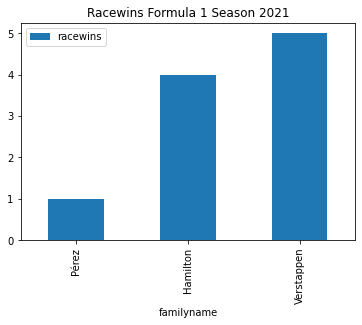

In [14]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################

import matplotlib.pyplot as plt
# query only rows in large Data Frame "df" where position is 1 and get columns position and familyname.
df_wins = df.loc[df['position'] == 1, ['position','familyname',]]
# like groupby in SQL!!
total_wins = df_wins.groupby(["familyname"], as_index=False)["position"].count()
# sort the data in ascending order
total_wins.sort_values(by=['position'], inplace=True)
total_wins.rename(columns = {'position':'racewins'}, inplace = True)
total_wins.plot(x ='familyname', y='racewins', kind = 'bar')
plt.title('Racewins Formula 1 Season 2021')
plt.show()

# Show us all pilots total times on podium in season 2021

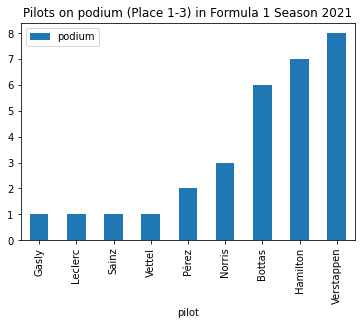

In [15]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################

import matplotlib.pyplot as plt
# query only rows in large Data Frame "df" where position is 1-3 and get columns position and familyname.
df_temp = df.loc[df['position'] < 4, ['position','familyname',]]
df_podium = df_temp.groupby(["familyname"], as_index=False)["position"].count()
df_podium.sort_values(by=['position'], inplace=True)
df_podium.rename(columns = {'position':'podium'}, inplace = True)
df_podium.rename(columns = {'familyname':'pilot'}, inplace = True)
df_podium.plot(x ='pilot', y='podium', kind = 'bar')
plt.title('Pilots on podium (Place 1-3) in Formula 1 Season 2021')
plt.show()

# Show all times pilots scored points in Season 2021

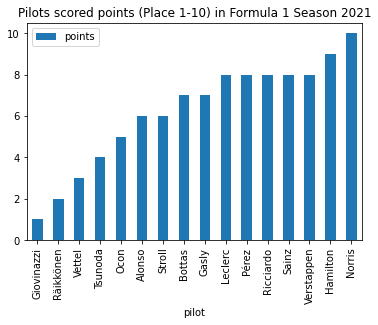

In [16]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################

import matplotlib.pyplot as plt
# query only rows in large Data Frame "df" where position is 1 and get columns position and familyname.
df_temp = df.loc[df['position'] < 11, ['position','familyname',]]
df_podium = df_temp.groupby(["familyname"], as_index=False)["position"].count()
df_podium.sort_values(by=['position'], inplace=True)
df_podium.rename(columns = {'position':'points'}, inplace = True)
df_podium.rename(columns = {'familyname':'pilot'}, inplace = True)
df_podium.plot(x ='pilot', y='points', kind = 'bar')
plt.title('Pilots scored points (Place 1-10) in Formula 1 Season 2021')
plt.show()

# Show the current drivers standing for Season 2021

In [17]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################

import requests as rq
import pandas as pd
import numpy as np
r = rq.get('http://46.101.137.47:8080/ords/f1_access/driverstandings/?q={"season":"2021"}&limit=1000')
print(r.status_code)
print(r.headers['content-type'])
print(r.encoding)
data = r.json()
df_driver_standings = pd.json_normalize(data,'items')
# Print number of rows in data set
print(df_driver_standings.shape[0])
# Some options to se all rows and cols
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
# Remove some columns we do not need in output
df_driver_standings = df_driver_standings.drop(columns=['race','info','constructorinfo'])
# convert points from string to int64
df_driver_standings = df_driver_standings.astype({'points': np.int64})

200
application/json
utf-8
20


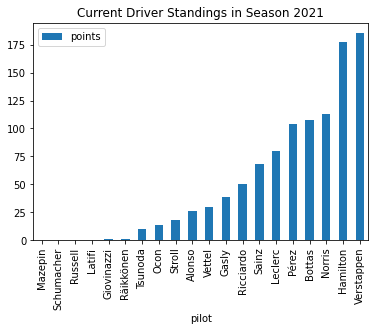

In [10]:
import matplotlib.pyplot as plt
df_driver_standings = df_driver_standings.loc[df_driver_standings['points'] >= 0, ['points','familyname']]
df_driver_standings.sort_values(by=['points'], inplace=True)
df_driver_standings.rename(columns = {'familyname':'pilot'}, inplace = True)
df_driver_standings.plot(x ='pilot', y='points', kind = 'bar')
plt.title('Current Driver Standings in Season 2021')
plt.show()

# Show the current constructors standings in Season 2021

In [18]:
from IPython.display import HTML
from IPython.display import display

# Taken from https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=true; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
To show/hide this cell's raw code input, click <a href="javascript:code_toggle()">here</a>.''')
display(tag)

############### Write code below ##################

import requests as rq
import pandas as pd
import numpy as np
r = rq.get('http://46.101.137.47:8080/ords/f1_access/constructorstandings/?q={"season":"2021"}&limit=1000')
print(r.status_code)
print(r.headers['content-type'])
print(r.encoding)
data = r.json()
df_standings = pd.json_normalize(data,'items')
# Print number of rows in data set
print(df_standings.shape[0])
# Some options to se all rows and cols
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
# Remove some columns we do not need in output
df_standings = df_standings.drop(columns=['race','position','positiontext','wins','constructorinfo'])
# convert points from string to int64
df_standings = df_standings.astype({'points': np.int64})
# Sort the Data Frame by race and place in the race
df_standings.sort_values(by=['points'], inplace=True)

200
application/json
utf-8
10


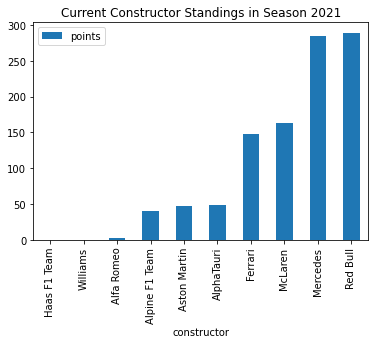

In [12]:
import matplotlib.pyplot as plt
df_standings = df_standings.loc[df_standings['points'] >= 0, ['points','constructorname']]
df_standings.sort_values(by=['points'], inplace=True)
df_standings.rename(columns = {'constructorname':'constructor'}, inplace = True)
df_standings.plot(x ='constructor', y='points', kind = 'bar')
plt.title('Current Constructor Standings in Season 2021')
plt.show()